In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from datetime import datetime, timedelta
from fredapi import Fred

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
fred_key = '9fae277e3b19db7ca2e4209298ec2b0a'

fred = Fred(api_key=fred_key)

In [329]:
home_sales_search = fred.search('Median Sales Price of Houses Sold for Region', order_by='popularity')
home_sales_search  = home_sales_search.query('frequency == "Quarterly"')
home_sales_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
MSPNE,MSPNE,2023-06-26,2023-06-26,Median Sales Price of Houses Sold for the Nort...,1963-01-01,2023-01-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2023-04-25 09:02:12-05:00,37,None
MSPW,MSPW,2023-06-26,2023-06-26,Median Sales Price of Houses Sold for the West...,1963-01-01,2023-01-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2023-04-25 09:02:17-05:00,31,None
MSPS,MSPS,2023-06-26,2023-06-26,Median Sales Price of Houses Sold for the Sout...,1963-01-01,2023-01-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2023-04-25 09:02:16-05:00,30,None
MSPMW,MSPMW,2023-06-26,2023-06-26,Median Sales Price of Houses Sold for the Midw...,1963-01-01,2023-01-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2023-04-25 09:02:15-05:00,29,None


In [330]:
all_results = []

for myid in home_sales_search.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
home_sales_search_results = pd.concat(all_results, axis=1)
home_sales_search_results

,MSPNE,MSPW,MSPS,MSPMW
1963-01-01,20800.0,18000.0,16800.0,17500.0
1963-04-01,20600.0,18900.0,15800.0,17700.0
1963-07-01,19600.0,19000.0,15900.0,17800.0
1963-10-01,20600.0,19500.0,15800.0,19100.0
1964-01-01,20300.0,19600.0,16500.0,18700.0
...,...,...,...,...
2022-01-01,580600.0,574400.0,385900.0,393500.0
2022-04-01,577100.0,582600.0,408800.0,412500.0
2022-07-01,699000.0,567400.0,437200.0,409900.0
2022-10-01,686600.0,564600.0,448600.0,355000.0


In [342]:
home_sales_combined = home_sales_search_results.copy()
home_sales_combined.index = pd.to_datetime(home_sales_combined.index)
target_date = pd.to_datetime('2018-01-01')
home_sales_combined = home_sales_combined[home_sales_combined.index >= target_date]

home_sales_combined.rename(columns={'MSPNE': 'Northeast Region'}, inplace=True)
home_sales_combined.rename(columns={'MSPW': 'West Region'}, inplace=True)
home_sales_combined.rename(columns={'MSPS': 'South Region'}, inplace=True)
home_sales_combined.rename(columns={'MSPMW': 'Midwest Region'}, inplace=True)
home_sales_combined.head()


,Northeast Region,West Region,South Region,Midwest Region
2018-01-01,437500.0,408000.0,295800.0,291200.0
2018-04-01,453300.0,423400.0,285300.0,277600.0
2018-07-01,503700.0,408600.0,296100.0,292100.0
2018-10-01,519700.0,404300.0,291600.0,300300.0
2019-01-01,480300.0,402000.0,280000.0,288700.0


In [340]:
px.defaults.template = "plotly_dark"
fig = px.line(home_sales_combined)
line_colors = ['red', 'green', 'blue', 'white']


for i, line_color in enumerate(line_colors):
    fig.update_traces(selector=dict(name=f'Line {i+1}'), line=dict(color=line_color, width=2))


fig.update_layout(
    font=dict(color="white"),  
    legend=dict(font=dict(color="white")),  
    xaxis=dict(color="white", showgrid=False, title=""),
    yaxis=dict(color="white", showgrid=False, title="Median Home Price"),
    width=2000,  
    height=600, 
)

fig.show()

In [334]:
home_sales_combined.info()
home_sales_combined.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2018-01-01 to 2023-01-01
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Northeast Region  21 non-null     float64
 1   West Region       21 non-null     float64
 2   South Region      21 non-null     float64
 3   Midwest Region    21 non-null     float64
dtypes: float64(4)
memory usage: 840.0 bytes


,Northeast Region,West Region,South Region,Midwest Region
2018-01-01,437500.0,408000.0,295800.0,291200.0
2018-04-01,453300.0,423400.0,285300.0,277600.0
2018-07-01,503700.0,408600.0,296100.0,292100.0
2018-10-01,519700.0,404300.0,291600.0,300300.0
2019-01-01,480300.0,402000.0,280000.0,288700.0


In [335]:
mortgage_rates = fred.get_series(series_id='MORTGAGE30US')
mortgage_rates = pd.DataFrame(mortgage_rates)
target_date = pd.to_datetime('2018-01-01')
mortgage_rates = mortgage_rates[mortgage_rates.index >= target_date]
mortgage_rates.rename(columns={0: 'Mortgage Rates'}, inplace=True)
mortgage_rates.head()

,Mortgage Rates
2018-01-04,3.95
2018-01-11,3.99
2018-01-18,4.04
2018-01-25,4.15
2018-02-01,4.22


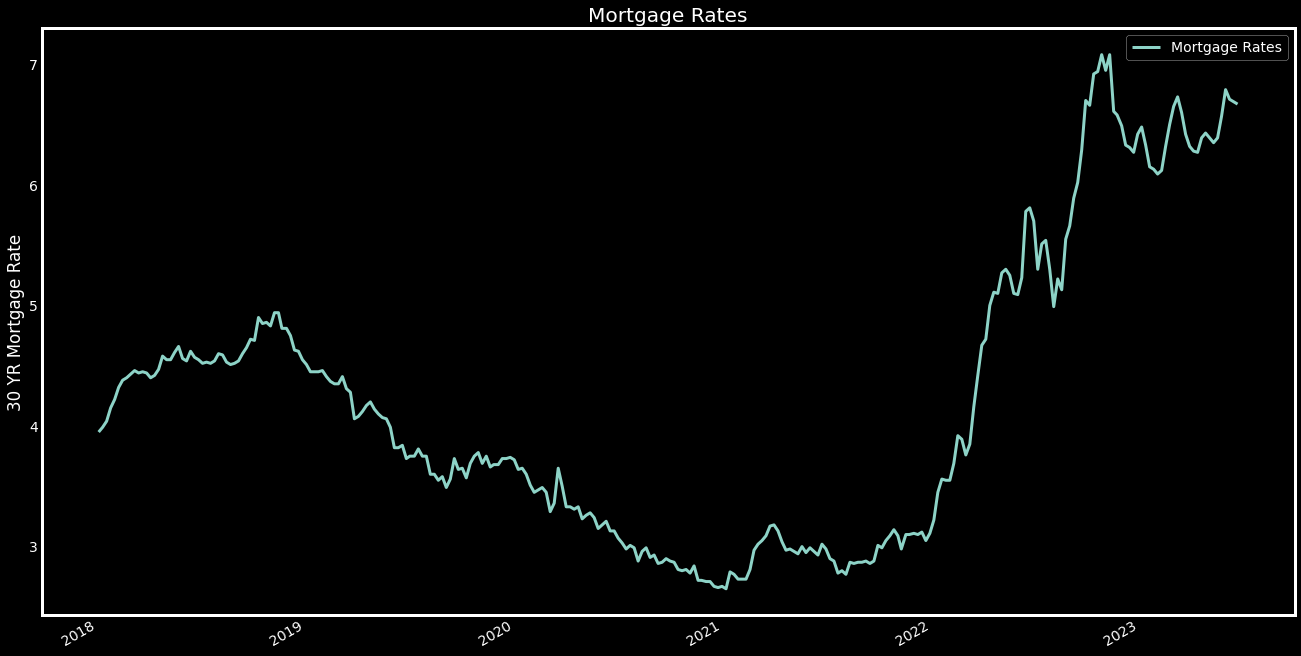

In [336]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20, 12))
mortgage_rates.plot(ax=ax, lw=3)
ax.grid(visible=False)
ax.set_xlabel('')
ax.set_ylabel('30 YR Mortgage Rate')
ax.set_title('Mortgage Rates')
plt.show()

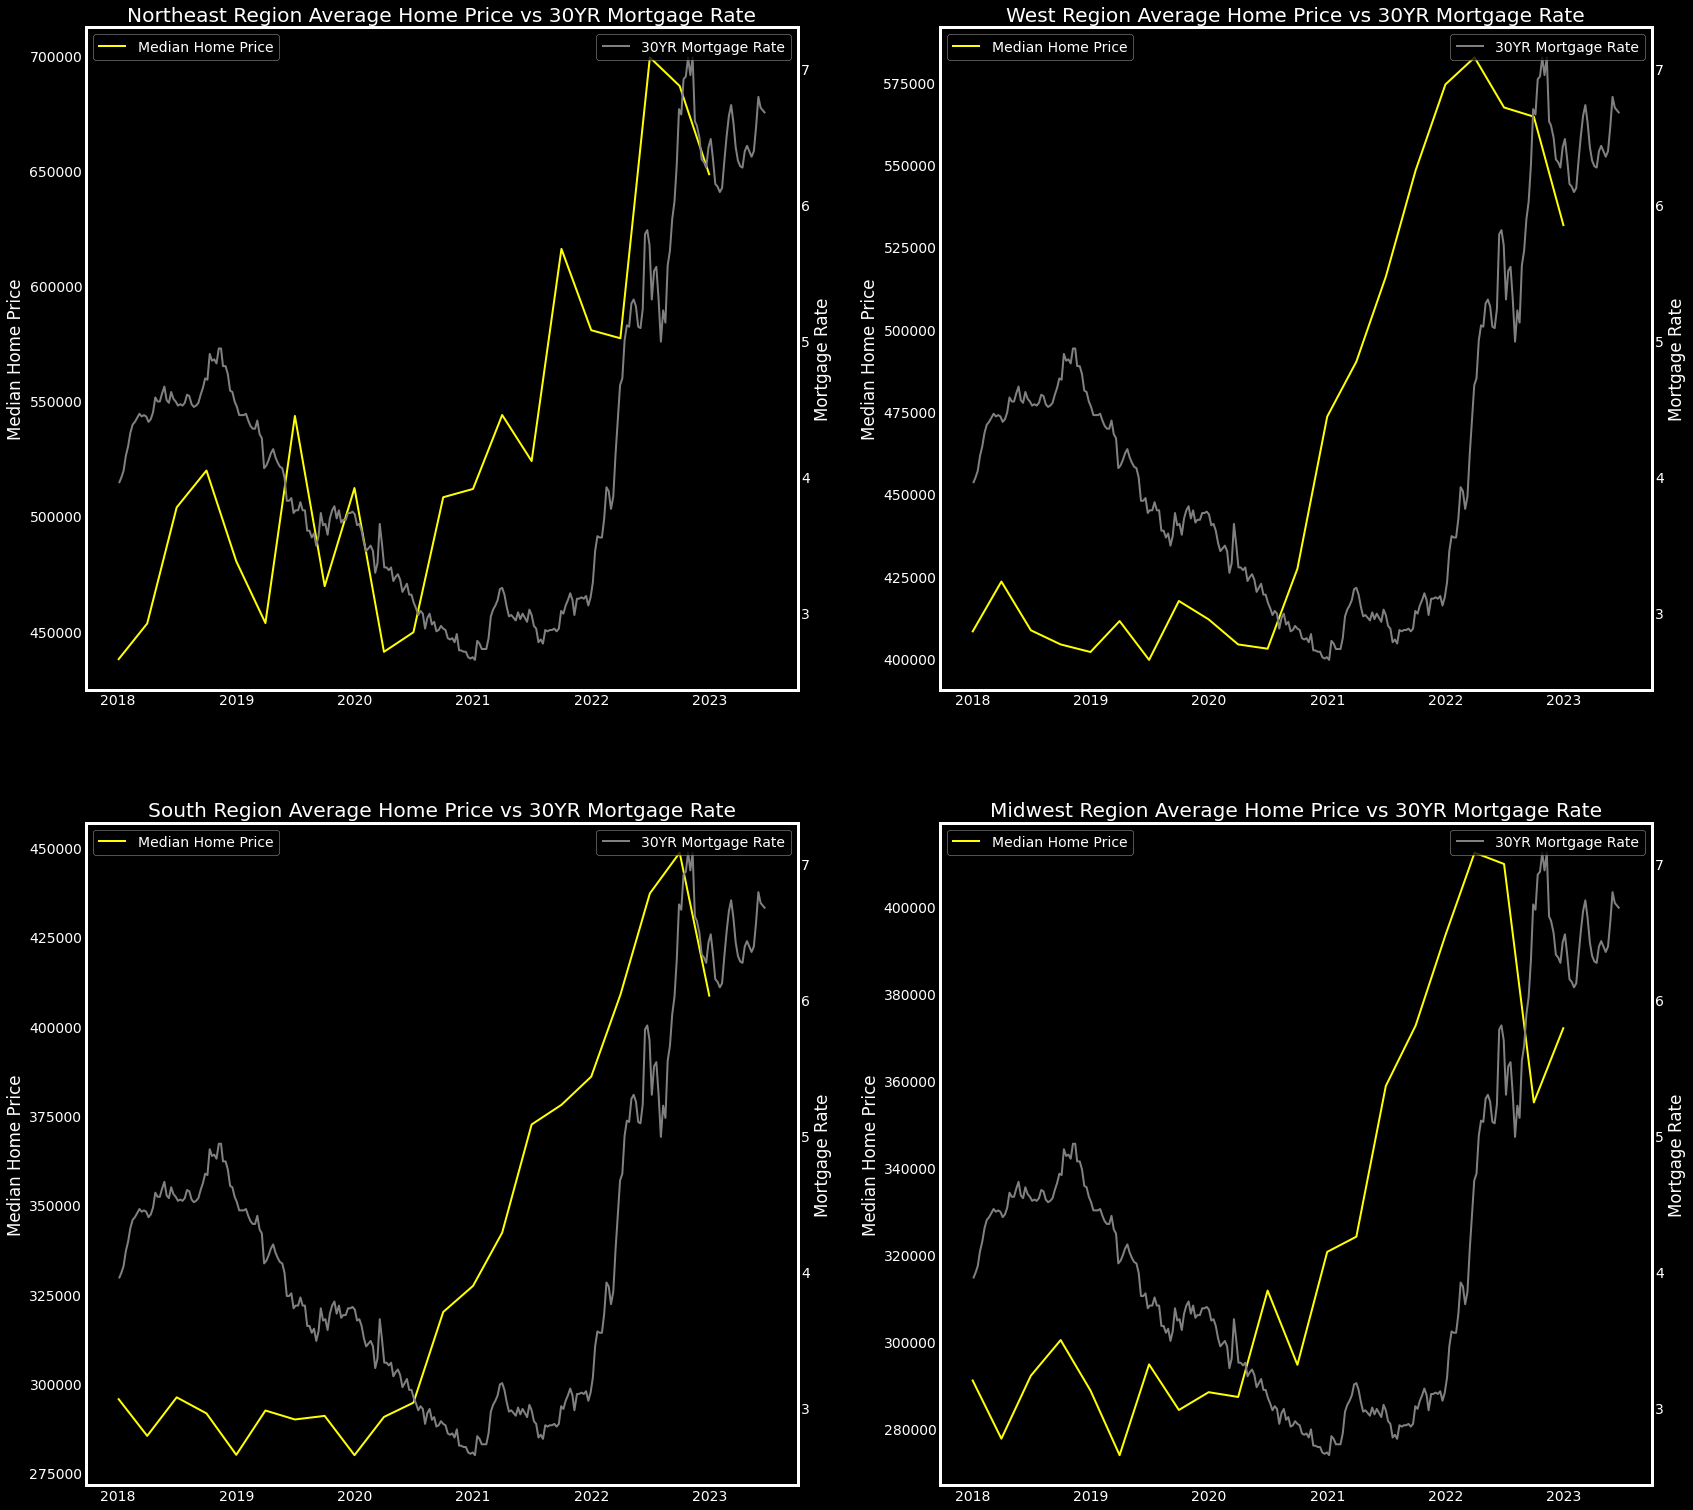

In [341]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))
axs = axs.flatten()

for i, region in enumerate(home_sales_combined.columns):
  
    axs[i].plot(home_sales_combined.index, home_sales_combined[region], color='yellow', label="Median Home Price", linewidth=2)
    axs[i].set_ylabel("Median Home Price")
    ax2 = axs[i].twinx()
    ax2.plot(mortgage_rates.index, mortgage_rates['Mortgage Rates'], color='gray', label="30YR Mortgage Rate", linewidth=2,)
    ax2.grid(False)
    ax2.set_ylabel("Mortgage Rate")
    axs[i].set_title(f'{region} Average Home Price vs 30YR Mortgage Rate')
    axs[i].legend(loc='upper left')
    ax2.legend(loc='upper right')

for ax in axs:
    ax.grid(False)

plt.show()